# Project OilyGiant by Maria Shemyakina

This work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

Collect the oil well parameters in the selected region: oil quality and volume of reserves;

Build a model for predicting the volume of reserves in the new wells;

Pick the oil wells with the highest estimated values;

Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. 

Build a model that will help to pick the region with the highest profit margin. 

Analyze potential profit and risks using the Bootstrapping technique.

    Project instructions
1.Download and prepare the data. Explain the procedure.

2.Train and test the model for each region:

    2.1. Split the data into a training set and validation set at a ratio of 75:25.
    2.2. Train the model and make predictions for the validation set.
    2.3. Save the predictions and correct answers for the validation set.
    2.4. Print the average volume of predicted reserves and model RMSE.
    2.5. Analyze the results.
    
3.Prepare for profit calculation:

    3.1. Store all key values for calculations in separate variables.
    3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
    3.3. Provide the findings about the preparation for profit calculation step.
4. Write a function to calculate profit from a set of selected oil wells and model predictions:
 
    4.1. Pick the wells with the highest values of predictions.
    4.2. Summarize the target volume of reserves in accordance with these predictions
    4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.
    
5. Calculate risks and profit for each region:
    5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
    5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
    5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

## 1.Download and prepare the data.

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from scipy import stats as st

In [2]:
df0=pd.read_csv('geo_data_0.csv')
df1=pd.read_csv('geo_data_1.csv')
df2=pd.read_csv('geo_data_2.csv')

Let's explore our data

In [3]:
df0.head()


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
df0.duplicated().sum() 

0

In [7]:
df1.head()


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
df1.duplicated().sum() 

0

In [11]:
df2.head()


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [14]:
df2.duplicated().sum() 

0

### Conclusion

We have a pretty clean data, so let's go to the step 2

## 2.Train and test the model for each region

    2.1. Split the data into a training set and validation set at a ratio of 75:25.
    2.2. Train the model and make predictions for the validation set.
    2.3. Save the predictions and correct answers for the validation set.
    2.4. Print the average volume of predicted reserves and model RMSE.
    2.5. Analyze the results.

In [15]:
SEED=1234

In [16]:
features_0 = df0.drop(['id', 'product'], axis=1)
target_0 = df0['product']
features_train_0, features_valid_0, target_train_0, target_valid_0 = (train_test_split(features_0, 
                                                                               target_0, 
                                                                               test_size = 0.25, 
                                                                               random_state=SEED))

In [17]:
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_0 = model_0.predict(features_valid_0)
rmse_0 = (mean_squared_error(target_valid_0, predictions_0))**0.5
ave_0 = target_0.mean()

print('RMSE =', rmse_0)
print('Average volume of predicted reserves =', ave_0)

RMSE = 37.562394183637785
Average volume of predicted reserves = 92.49999999999976


In [18]:
features_1 = df1.drop(['id', 'product'], axis=1)
target_1 = df1['product']
features_train_1, features_valid_1, target_train_1, target_valid_1 = (train_test_split(features_1, 
                                                                               target_1, 
                                                                               test_size = 0.25, 
                                                                               random_state=SEED))

In [19]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_1 = model_1.predict(features_valid_1)
rmse_1 = (mean_squared_error(target_valid_1, predictions_1))**0.5
ave_1 = target_1.mean()

print('RMSE 1 =', rmse_1)
print('Average volume of predicted reserves 1 =', ave_1)

RMSE 1 = 0.8939344738117704
Average volume of predicted reserves 1 = 68.82500000002561


In [20]:
features_2 = df2.drop(['id', 'product'], axis=1)
target_2 = df2['product']
features_train_2, features_valid_2, target_train_2, target_valid_2 = (train_test_split(features_2, 
                                                                               target_2, 
                                                                               test_size = 0.25, 
                                                                               random_state=SEED))

In [21]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_2 = model_2.predict(features_valid_2)
rmse_2 = (mean_squared_error(target_valid_2, predictions_2))**0.5
ave_2 = target_2.mean()

print('RMSE 2 =', rmse_2)
print('Average volume of predicted reserves 2 =', ave_2)

RMSE 2 = 40.10318099258418
Average volume of predicted reserves 2 = 95.00000000000041


Let's built a distplot for each region and look at the distribution of 'product'.

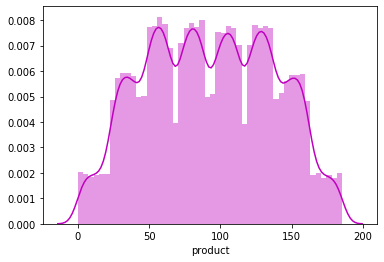

In [34]:
sns.distplot(df0['product'], color='m')


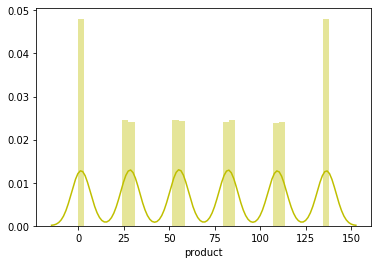

In [33]:

sns.distplot(df1['product'], color='y')

    

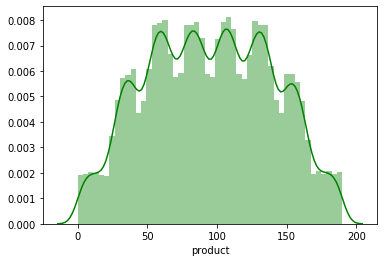

In [24]:
sns.distplot(df2['product'], color='green')


### Conclusion


As we can see, in the zero and second regions, the average volume of predicted reserves is higher than in the first.
In the first field, the prediction model works better and RMSE is higher.

## 3.Prepare for profit calculation:

    3.1. Store all key values for calculations in separate variables.
    3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
    3.3. Provide the findings about the preparation for profit calculation step.

In [25]:
#Store all key values in separate variables

number_of_oil_wells = 200
budget = 100000000
#cost_per_one_oil_well=budget/number_of_oil_wells
cost_per_one_oil_well = 500000
revenue_per_unit = 4.5*1000


In [26]:
#Calculate the volume of reserves sufficient for developing a new well without losses
vol_reserve =  cost_per_one_oil_well / revenue_per_unit
print('The volume of reserves sufficient for developing a new well without losses is', vol_reserve)

The volume of reserves sufficient for developing a new well without losses is 111.11111111111111


### Conclusion

If we would known how much revenue is generated from one item of product, we can calculate the expected number of items of products. This number will be our estimated volume of the reserve.
As we can see  111.11 is the volume of reserves sufficient for developing a new well. This volume is bigger than the average predicted volumes so we can use a bootstrap for a more accurate results for choosing a best region.

## 4. Write a function to calculate profit from a set of selected oil wells and model predictions:
 
    4.1. Pick the wells with the highest values of predictions.
    4.2. Summarize the target volume of reserves in accordance with these predictions
    4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [27]:
def profit(target, predictions, count, revenue_per_unit, cost_per_one_oil_well):
    predicted_sort = pd.Series(predictions).sort_values(ascending=False)
    target.reset_index(drop=True, inplace=True)
    oil_wells = target[predicted_sort.index][:count]
    region_sum = oil_wells.sum()
    revenue = region_sum * revenue_per_unit
    cost = count * cost_per_one_oil_well
    
    return revenue-cost

In [28]:
profit_0 = profit(target_valid_0, predictions_0, 200, revenue_per_unit, cost_per_one_oil_well)
profit_1 = profit(target_valid_1, predictions_1, 200, revenue_per_unit, cost_per_one_oil_well)
profit_2 = profit(target_valid_2, predictions_2, 200, revenue_per_unit, cost_per_one_oil_well)

print('Profit for region 0:', profit_0) 
print('Profit for region 1:', profit_1) 
print('Profit for region 2:', profit_2)

Profit for region 0: 34240263.20247537
Profit for region 1: 24150866.966815114
Profit for region 2: 25549554.244339585


### Conclusion
After calculating the profit, region0 showed that the profit received from this location is the highest.
But this is a one-time assessment, which may be different in real life. To better understand the profits of each region, we need to compare the distribution of profits in the three regions.

## 5. Calculate risks and profit for each region:
    5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
    5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
    5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

In [29]:
def bootstrap(target, prediction):
    state = np.random.RandomState(12345)
    
    values=[]
    for i in range(1000):
        target_resample = target.sample(n=500, replace=True, random_state=state)
        pred_resample = prediction[target_resample.index]
        values.append(profit(target_resample, pred_resample, 200, revenue_per_unit, cost_per_one_oil_well))
        
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    return mean, lower, upper

In [30]:
#average profit,95% conf.lower interval and upper interval
print('Average profit, 95% conf lower and upper interval')
print('For region_0: ', bootstrap(target_valid_0, predictions_0))

Average profit, 95% conf lower and upper interval
For region_0:  (3874697.597257036, -1645711.7673689057, 8724395.111968258)


In [31]:
print('For region_1: ', bootstrap(target_valid_1, predictions_1))

For region_1:  (4340063.987052234, 467378.5974834983, 8202472.098189625)


In [32]:
print('For region_2: ',bootstrap(target_valid_2, predictions_2))

For region_2:  (3315878.481831267, -1913987.219885698, 8646563.99119106)


### Conclusion
As we can see, region 1 would be the most profitable since it has the highest average profit which has been simulated over 1000 times.
Both region 0 and region2 have a risk of losses because its lower boundary of 95% confidence interval is negative.
So we clearly  see, that multiple modeling is very important and gives us more accurate results.
